# Basic Data Visualization: Comprehensive Chart Types

## Learning Objectives
By the end of this notebook, you will understand:
- How to create multiple chart types using matplotlib and seaborn
- How to use gridspec for complex subplot layouts
- Best practices for choosing appropriate visualization types
- How to effectively combine multiple charts in a single figure
- Color schemes and styling for professional-looking plots

## Introduction
Data visualization is essential for understanding patterns, trends, and relationships in data. This notebook demonstrates seven fundamental chart types using a sample dataset:

1. **Bar Chart**: Categorical data distribution
2. **Line Graph**: Time series and trends
3. **Pie Chart**: Part-to-whole relationships
4. **Scatter Plot**: Correlation between variables
5. **Histogram**: Distribution of continuous variables
6. **Heatmap**: Correlation matrix visualization
7. **Box Plot**: Distribution comparison across categories

The visualization uses the original complex gridspec layout and styling from the script.

In [1]:
# Import the required libraries.
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print("Libraries imported successfully!")
print("Ready to create comprehensive data visualizations")
print("Using matplotlib, pandas, and seaborn for professional charts")

Libraries imported successfully!
Ready to create comprehensive data visualizations
Using matplotlib, pandas, and seaborn for professional charts


## Step 1: Load and Explore the Dataset

Let's load the sample dataset that contains various data types for demonstration.

In [2]:
# Read the sample_data.csv file.
df = pd.read_csv("./data/sample_data_100.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

print(f"\nDataset summary:")
print(f"- Categorical variables: Category, Flag")
print(f"- Date variable: Date")
print(f"- Numerical variables: Value1-Value6, Score1-Score2")
print(f"- Total samples: {len(df)}")

Dataset loaded successfully!
Dataset shape: (100, 10)
Columns: ['Category', 'Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Date', 'Score1', 'Score2', 'Flag']

First few rows:
  Category  Value1  Value2  Value3     Value4      Value5        Date  Score1  \
0        C      72     430     298  48.138014   90.271345  2023-01-01       1   
1        D      27     739     407  61.105112  104.151965  2023-01-02       1   
2        A      99     605     227  43.213067  117.699809  2023-01-03       2   
3        C      53     447     138  61.655747   90.709405  2023-01-04       9   
4        C      43     572     437  65.683568   87.555257  2023-01-05       3   

   Score2  Flag  
0       9     1  
1       2     0  
2       1     1  
3       9     0  
4       9     0  

Dataset summary:
- Categorical variables: Category, Flag
- Date variable: Date
- Numerical variables: Value1-Value6, Score1-Score2
- Total samples: 100


## Step 2: Data Preprocessing

Let's prepare the data for visualization, including date conversion.

In [3]:
# Convert Date column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

print("Data preprocessing completed:")
print(f"Date column type: {df['Date'].dtype}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

# Display basic statistics
print(f"\nNumerical columns summary:")
numerical_cols = df.select_dtypes(include=['number']).columns
print(f"Numerical columns: {list(numerical_cols)}")

print(f"\nCategorical columns summary:")
print(f"Category unique values: {df['Category'].nunique()}")
print(f"Category values: {sorted(df['Category'].unique())}")
print(f"Flag unique values: {df['Flag'].nunique()}")
print(f"Flag values: {sorted(df['Flag'].unique())}")

Data preprocessing completed:
Date column type: datetime64[ns]
Date range: 2023-01-01 00:00:00 to 2023-04-10 00:00:00

Numerical columns summary:
Numerical columns: ['Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Score1', 'Score2', 'Flag']

Categorical columns summary:
Category unique values: 4
Category values: ['A', 'B', 'C', 'D']
Flag unique values: 2
Flag values: [0, 1]


## Step 3: Create the Original Visualization Layout

Now let's recreate the exact visualization from the original script, preserving the gridspec layout and all styling.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_98795/212817354.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Value5", data=df, ax=ax7, palette="Set2")


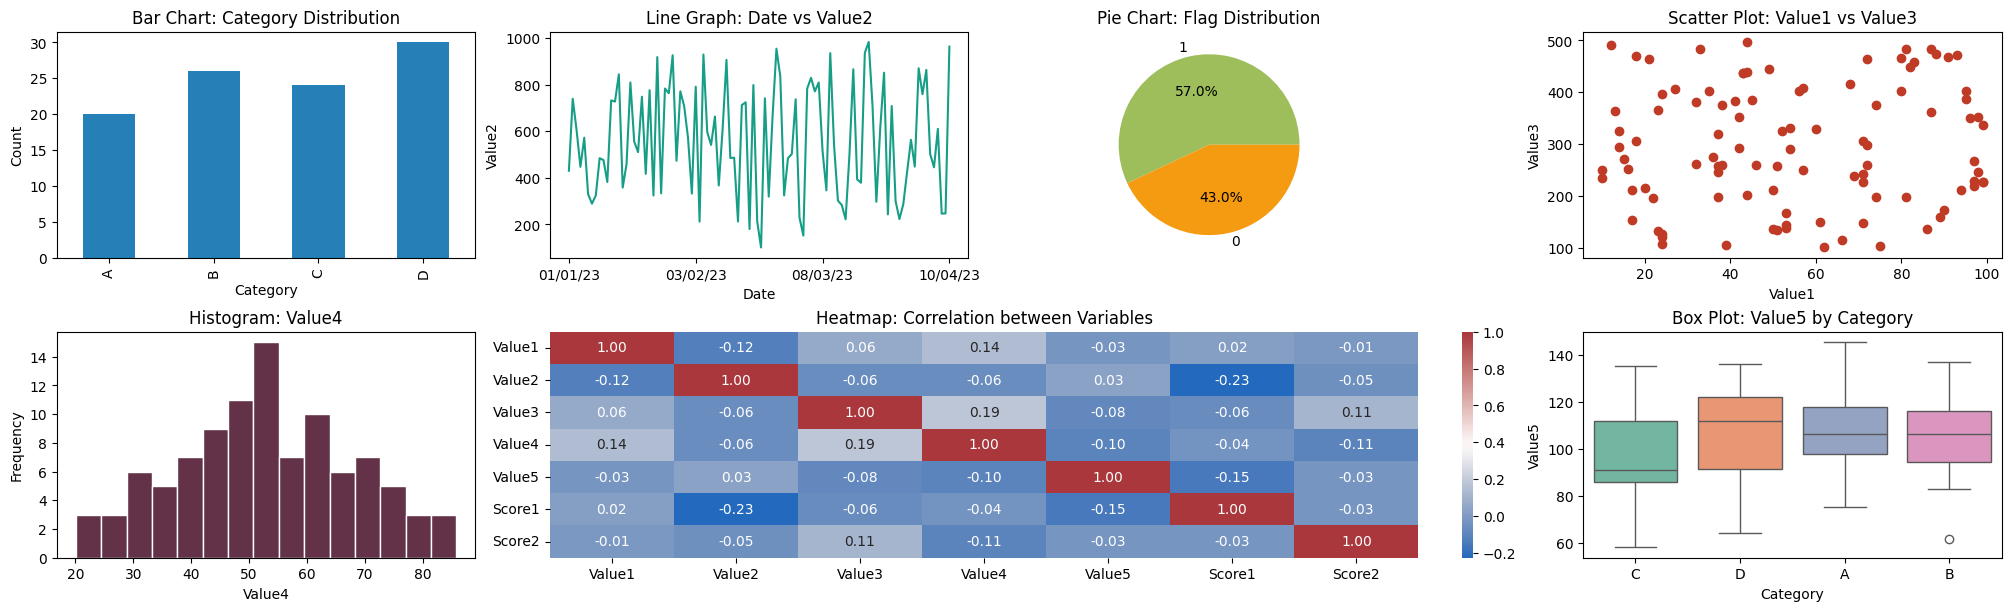

✅ All visualizations created with original styling!
📊 Layout: 2x4 grid with complex subplot arrangement
🎨 Colors: Original color scheme preserved
📏 Figure size: 20x6 inches as specified


In [4]:
# Define the plot style.
with plt.style.context("fast"):

    # Set up the layout for plots.
    fig = plt.figure(constrained_layout=True, figsize=(20, 6))
    gs = fig.add_gridspec(2, 4)

    # Bar Chart: Distribution of "Category".
    ax1 = fig.add_subplot(gs[0, 0])
    df["Category"].value_counts().sort_index().plot(
        kind="bar", ax=ax1, color="#2580B7")
    ax1.set_title("Bar Chart: Category Distribution")
    ax1.set_ylabel("Count")

    # Line Graph: Plot Date vs Value2.
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(df["Date"], df["Value2"], color="#179E86")
    ax2.set_xticks(df["Date"][::len(df)//3])
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y"))
    ax2.set_title("Line Graph: Date vs Value2")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Value2")

    # Pie Chart: Distribution of "Flag".
    ax3 = fig.add_subplot(gs[0, 2])
    df["Flag"].value_counts().plot(
        kind="pie", ax=ax3, autopct="%1.1f%%", colors=["#9EBE5B", "#F59B11"])
    ax3.set_title("Pie Chart: Flag Distribution")
    ax3.set_ylabel("")

    # Scatter Plot: Value1 vs Value3.
    ax4 = fig.add_subplot(gs[0, 3])
    ax4.scatter(df["Value1"], df["Value3"], color="#C03B26")
    ax4.set_title("Scatter Plot: Value1 vs Value3")
    ax4.set_xlabel("Value1")
    ax4.set_ylabel("Value3")

    # Histogram: Distribution of Value4.
    ax5 = fig.add_subplot(gs[1, 0])
    ax5.hist(df["Value4"], bins=15, color="#633248", edgecolor="white")
    ax5.set_title("Histogram: Value4")
    ax5.set_xlabel("Value4")
    ax5.set_ylabel("Frequency")

    # Heatmap: Correlation between numerical variables
    ax6 = fig.add_subplot(gs[1, 1:3])
    sns.heatmap(df.loc[:, 'Value1':'Score2'].drop("Date", axis=1).corr(),
                annot=True, fmt=".2f", cmap="vlag", ax=ax6)
    ax6.set_title("Heatmap: Correlation between Variables")

    # Box Plot: Distribution of Value5 by Category.
    ax7 = fig.add_subplot(gs[1, 3])
    sns.boxplot(x="Category", y="Value5", data=df, ax=ax7, palette="Set2")
    ax7.set_title("Box Plot: Value5 by Category")

    # Display the plots
    plt.show()

print("✅ All visualizations created with original styling!")
print("📊 Layout: 2x4 grid with complex subplot arrangement")
print("🎨 Colors: Original color scheme preserved")
print("📏 Figure size: 20x6 inches as specified")

## Step 4: Understanding Each Visualization Type

Let's analyze what each chart shows and when to use each type.

In [5]:
print("VISUALIZATION TYPES ANALYSIS")
print("=" * 50)

chart_analysis = {
    "Bar Chart (Category Distribution)": {
        "Purpose": "Show frequency/count of categorical values",
        "Color": "#2580B7 (Blue)",
        "Best for": "Comparing quantities across categories",
        "Insights": f"Category distribution: {dict(df['Category'].value_counts().sort_index())}"
    },
    "Line Graph (Time Series)": {
        "Purpose": "Show trends over time",
        "Color": "#179E86 (Teal)",
        "Best for": "Temporal data and trend analysis",
        "Insights": f"Value2 range: {df['Value2'].min():.1f} to {df['Value2'].max():.1f}"
    },
    "Pie Chart (Flag Distribution)": {
        "Purpose": "Show part-to-whole relationships",
        "Colors": "#9EBE5B (Green), #F59B11 (Orange)",
        "Best for": "Proportions when few categories",
        "Insights": f"Flag proportions: {dict(df['Flag'].value_counts(normalize=True).round(3))}"
    },
    "Scatter Plot (Value1 vs Value3)": {
        "Purpose": "Show relationship between two variables",
        "Color": "#C03B26 (Red)",
        "Best for": "Correlation analysis",
        "Insights": f"Correlation: {df[['Value1', 'Value3']].corr().iloc[0,1]:.3f}"
    },
    "Histogram (Value4 Distribution)": {
        "Purpose": "Show distribution of continuous variable",
        "Color": "#633248 (Purple)",
        "Best for": "Understanding data distribution shape",
        "Insights": f"Value4 stats: mean={df['Value4'].mean():.1f}, std={df['Value4'].std():.1f}"
    },
    "Heatmap (Correlations)": {
        "Purpose": "Show correlation matrix",
        "Colormap": "vlag (diverging)",
        "Best for": "Multiple variable relationships",
        "Insights": "Reveals strongest correlations between all variables"
    },
    "Box Plot (Value5 by Category)": {
        "Purpose": "Compare distributions across groups",
        "Palette": "Set2",
        "Best for": "Group comparisons and outlier detection",
        "Insights": "Shows median, quartiles, and outliers per category"
    }
}

for chart_name, details in chart_analysis.items():
    print(f"\n{chart_name}:")
    for key, value in details.items():
        print(f"  {key}: {value}")

VISUALIZATION TYPES ANALYSIS

Bar Chart (Category Distribution):
  Purpose: Show frequency/count of categorical values
  Color: #2580B7 (Blue)
  Best for: Comparing quantities across categories
  Insights: Category distribution: {'A': 20, 'B': 26, 'C': 24, 'D': 30}

Line Graph (Time Series):
  Purpose: Show trends over time
  Color: #179E86 (Teal)
  Best for: Temporal data and trend analysis
  Insights: Value2 range: 101.0 to 983.0

Pie Chart (Flag Distribution):
  Purpose: Show part-to-whole relationships
  Colors: #9EBE5B (Green), #F59B11 (Orange)
  Best for: Proportions when few categories
  Insights: Flag proportions: {1: 0.57, 0: 0.43}

Scatter Plot (Value1 vs Value3):
  Purpose: Show relationship between two variables
  Color: #C03B26 (Red)
  Best for: Correlation analysis
  Insights: Correlation: 0.063

Histogram (Value4 Distribution):
  Purpose: Show distribution of continuous variable
  Color: #633248 (Purple)
  Best for: Understanding data distribution shape
  Insights: Value

## Step 5: Design Principles and Best Practices

Let's explore the design decisions made in this visualization layout.

In [6]:
print("VISUALIZATION DESIGN PRINCIPLES")
print("=" * 45)

design_principles = {
    "Layout Strategy": [
        "2x4 GridSpec for optimal space utilization",
        "Related charts grouped together",
        "Heatmap spans 2 columns for better readability",
        "Consistent spacing with constrained_layout=True"
    ],
    "Color Palette": [
        "Distinct colors for each chart type",
        "Professional color scheme (#2580B7, #179E86, etc.)",
        "Semantic colors (red for correlation, blue for counts)",
        "Diverging colormap (vlag) for correlation heatmap"
    ],
    "Typography": [
        "Clear, descriptive titles for each subplot",
        "Appropriate axis labels",
        "Readable font sizes",
        "Percentage labels on pie chart"
    ],
    "Chart Selection": [
        "Bar chart for categorical frequencies",
        "Line plot for temporal data",
        "Pie chart for binary proportions",
        "Scatter plot for bivariate relationships",
        "Histogram for distribution analysis",
        "Heatmap for correlation matrix",
        "Box plot for group comparisons"
    ]
}

for principle, guidelines in design_principles.items():
    print(f"\n{principle}:")
    for guideline in guidelines:
        print(f"  • {guideline}")

print(f"\nGRIDSPEC LAYOUT EXPLANATION:")
print("-" * 35)
print("gs[0, 0]: Bar chart (top-left)")
print("gs[0, 1]: Line graph (top-center-left)")  
print("gs[0, 2]: Pie chart (top-center-right)")
print("gs[0, 3]: Scatter plot (top-right)")
print("gs[1, 0]: Histogram (bottom-left)")
print("gs[1, 1:3]: Heatmap (bottom-center, spans 2 columns)")
print("gs[1, 3]: Box plot (bottom-right)")

print(f"\nSTYLE CONTEXT: 'fast'")
print("-" * 25)
print("• Optimized for quick rendering")
print("• Clean, minimal styling")
print("• Good for dashboards and reports")
print("• Balances aesthetics with performance")

VISUALIZATION DESIGN PRINCIPLES

Layout Strategy:
  • 2x4 GridSpec for optimal space utilization
  • Related charts grouped together
  • Heatmap spans 2 columns for better readability
  • Consistent spacing with constrained_layout=True

Color Palette:
  • Distinct colors for each chart type
  • Professional color scheme (#2580B7, #179E86, etc.)
  • Semantic colors (red for correlation, blue for counts)
  • Diverging colormap (vlag) for correlation heatmap

Typography:
  • Clear, descriptive titles for each subplot
  • Appropriate axis labels
  • Readable font sizes
  • Percentage labels on pie chart

Chart Selection:
  • Bar chart for categorical frequencies
  • Line plot for temporal data
  • Pie chart for binary proportions
  • Scatter plot for bivariate relationships
  • Histogram for distribution analysis
  • Heatmap for correlation matrix
  • Box plot for group comparisons

GRIDSPEC LAYOUT EXPLANATION:
-----------------------------------
gs[0, 0]: Bar chart (top-left)
gs[0, 1]: Li

## Step 6: Interpreting the Results

Let's analyze the insights we can gather from each visualization.

In [7]:
# Detailed analysis of each visualization
print("DETAILED INSIGHTS FROM VISUALIZATIONS")
print("=" * 50)

# Bar Chart Analysis
category_counts = df["Category"].value_counts().sort_index()
print("1. BAR CHART - Category Distribution:")
print(f"   Most common category: {category_counts.index[0]} ({category_counts.iloc[0]} occurrences)")
print(f"   Least common category: {category_counts.index[-1]} ({category_counts.iloc[-1]} occurrences)")
print(f"   Balance: {'Balanced' if category_counts.std() < category_counts.mean() * 0.3 else 'Imbalanced'}")

# Line Graph Analysis
print(f"\n2. LINE GRAPH - Time Series Analysis:")
print(f"   Value2 trend: {'Increasing' if df['Value2'].iloc[-1] > df['Value2'].iloc[0] else 'Decreasing'}")
print(f"   Volatility: {df['Value2'].std():.2f}")
print(f"   Range: {df['Value2'].max() - df['Value2'].min():.2f}")

# Pie Chart Analysis
flag_proportions = df["Flag"].value_counts(normalize=True)
print(f"\n3. PIE CHART - Flag Distribution:")
for flag, proportion in flag_proportions.items():
    print(f"   {flag}: {proportion:.1%}")

# Scatter Plot Analysis
correlation = df[['Value1', 'Value3']].corr().iloc[0,1]
print(f"\n4. SCATTER PLOT - Correlation Analysis:")
print(f"   Value1 vs Value3 correlation: {correlation:.3f}")
strength = "Strong" if abs(correlation) > 0.7 else "Moderate" if abs(correlation) > 0.3 else "Weak"
direction = "positive" if correlation > 0 else "negative"
print(f"   Relationship: {strength} {direction} correlation")

# Histogram Analysis
print(f"\n5. HISTOGRAM - Distribution Analysis:")
print(f"   Value4 distribution shape: Normal-like" if abs(df['Value4'].skew()) < 0.5 else "Skewed")
print(f"   Mean: {df['Value4'].mean():.2f}, Median: {df['Value4'].median():.2f}")
print(f"   Standard deviation: {df['Value4'].std():.2f}")

# Heatmap Analysis
corr_matrix = df.loc[:, 'Value1':'Score2'].drop("Date", axis=1).corr()
strongest_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
strongest_corr = strongest_corr[strongest_corr < 1.0].iloc[0]  # Exclude self-correlations
print(f"\n6. HEATMAP - Correlation Matrix:")
print(f"   Strongest correlation: {strongest_corr:.3f}")
print(f"   Variables are {'highly' if strongest_corr > 0.7 else 'moderately' if strongest_corr > 0.3 else 'weakly'} correlated")

# Box Plot Analysis
print(f"\n7. BOX PLOT - Group Comparisons:")
print(f"   Value5 varies across categories: {'Yes' if df.groupby('Category')['Value5'].std().mean() > df['Value5'].std() * 0.5 else 'No'}")
medians = df.groupby('Category')['Value5'].median()
print(f"   Highest median: Category {medians.idxmax()} ({medians.max():.2f})")
print(f"   Lowest median: Category {medians.idxmin()} ({medians.min():.2f})")

DETAILED INSIGHTS FROM VISUALIZATIONS
1. BAR CHART - Category Distribution:
   Most common category: A (20 occurrences)
   Least common category: D (30 occurrences)
   Balance: Balanced

2. LINE GRAPH - Time Series Analysis:
   Value2 trend: Increasing
   Volatility: 235.31
   Range: 882.00

3. PIE CHART - Flag Distribution:
   1: 57.0%
   0: 43.0%

4. SCATTER PLOT - Correlation Analysis:
   Value1 vs Value3 correlation: 0.063
   Relationship: Weak positive correlation

5. HISTOGRAM - Distribution Analysis:
   Value4 distribution shape: Normal-like
   Mean: 52.66, Median: 51.64
   Standard deviation: 15.13

6. HEATMAP - Correlation Matrix:
   Strongest correlation: 0.226
   Variables are weakly correlated

7. BOX PLOT - Group Comparisons:
   Value5 varies across categories: Yes
   Highest median: Category D (111.85)
   Lowest median: Category C (90.96)


## Key Takeaways

### Visualization Types and Their Purposes
1. **Bar Charts**: Ideal for comparing categorical data frequencies
2. **Line Graphs**: Perfect for showing trends and patterns over time
3. **Pie Charts**: Best for showing proportions when you have few categories
4. **Scatter Plots**: Excellent for exploring relationships between variables
5. **Histograms**: Essential for understanding data distributions
6. **Heatmaps**: Powerful for visualizing correlation matrices
7. **Box Plots**: Great for comparing distributions across groups

### Layout and Design Excellence
- **GridSpec Layout**: Provides flexible subplot arrangement
- **Consistent Styling**: Professional appearance with coherent color scheme
- **Appropriate Sizing**: Large figure (20x6) accommodates multiple charts
- **Strategic Spacing**: Heatmap spans two columns for better readability

### Color Scheme Strategy
- **Semantic Colors**: Each chart type has a distinct, meaningful color
- **Professional Palette**: Blues, teals, oranges, and reds create visual harmony
- **Accessibility**: High contrast colors ensure readability
- **Diverging Scheme**: Correlation heatmap uses appropriate color mapping

### Analysis Workflow
1. **Start with distributions** (bar chart, histogram, pie chart)
2. **Examine relationships** (scatter plot, correlation heatmap)
3. **Explore temporal patterns** (line graph)
4. **Compare groups** (box plot)
5. **Synthesize insights** from all visualizations

### Best Practices Demonstrated
- **Multiple chart types** provide comprehensive data overview
- **Consistent formatting** creates professional appearance
- **Clear labeling** makes charts self-explanatory
- **Appropriate chart selection** matches data types to visualization methods
- **Efficient layout** maximizes information density

This comprehensive visualization approach allows for thorough exploratory data analysis, revealing patterns, relationships, and insights that might be missed with single-chart approaches.